### Задание 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Ответ
Прокурор оценил вероятность редкой группы крови при условии невиновности в 1% и сделал вывод, что вероятность редкой группы крови при условии виновности 99%, хотя в единицу должны суммироваться противоположные условные вероятности, а не исходы при условии противоположных условий. И мы знаем из условия, что вероятность редкой группы крови при условии виновности равна 100%.

Прокурору надо было оценить вероятность виновности, при условии убийства человеком с редкой кровью, редкой крови подсудимого и того, что тот является подсудимым

### Задание 2
Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ
Адвокат оценил вероятность того, что убил именно подсудимый при условии того, что у него редкая кровь и убийство было совершено человеком с редкой кровью, а надо было оценить вероятность того, что убил именно подсудимый, при условии того, что у него редкая кровью, убийство было совершено человеком с редкой кровью, и он является подсудимым, что явно должно увеличить оценку вероятности.

### Задание 3
Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [14]:
import matplotlib.pyplot as plt
figsize = (15,8)
legend_fontsize = 16

In [30]:
# если data = 1, тест положительный
# error_type1 - вероятность ошибки первого рода p(t = 1|d = 0)
# error_type2 - вероятность ошибки второго рода p(t = 0|d = 1)
def compute_posterior(data, prior_prob=0.01, error_type1=0.05, error_type2=0.05):
    test_success_type1 = 1 - error_type1
    test_success_type2 = 1 - error_type2
    if data == 1:
        return (prior_prob * test_success_type2) / (prior_prob * test_success_type2 + (1-prior_prob) * (1-test_success_type1))
    elif data == 0:
        return (prior_prob * (1-test_success_type2)) / (prior_prob * (1-test_success_type2) + (1-prior_prob) * test_success_type1)
    else:
        return None

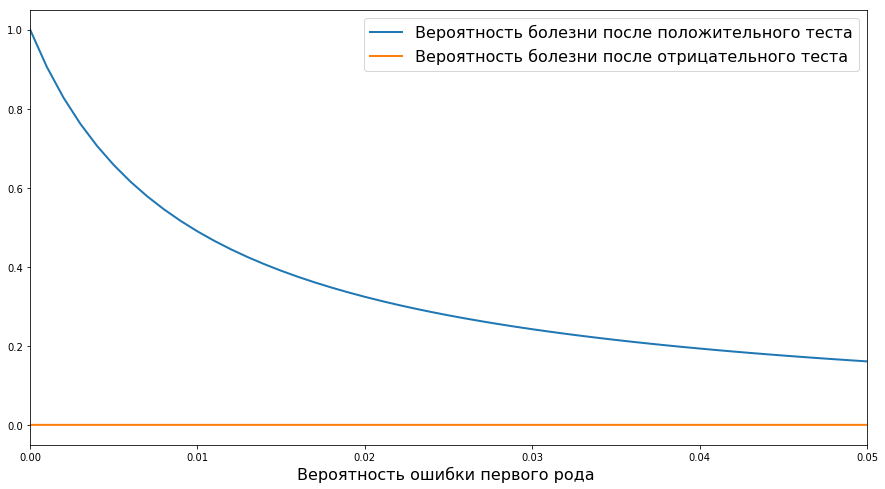

In [33]:
vector_posterior1 = np.vectorize(compute_posterior, excluded=['data', 'prior_prob', 'error_type2'])
xs = np.arange(0.0, 0.051, 0.001)
ys_one = vector_posterior1(1, error_type1=xs)
ys_zero = vector_posterior1(0, error_type1=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность болезни после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность болезни после отрицательного теста')
ax.set_xlim((0.0, 0.05))
ax.set_xlabel('Вероятность ошибки первого рода ', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

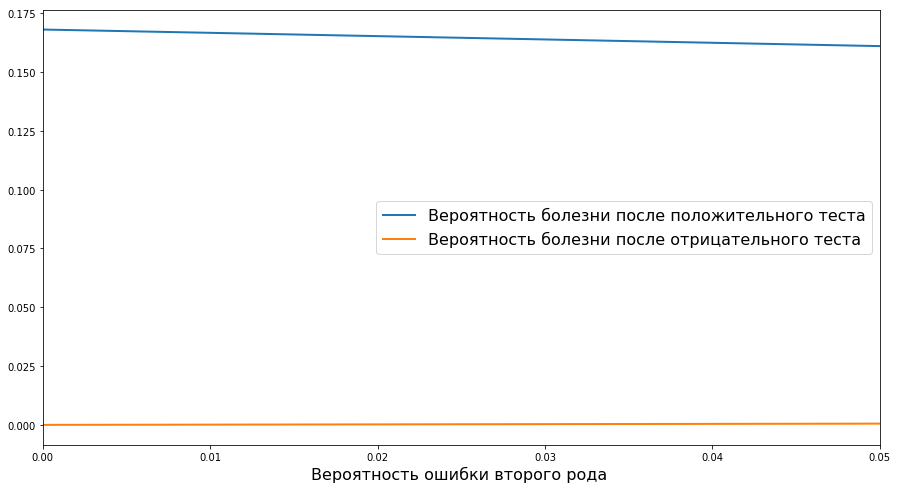

In [34]:
vector_posterior2 = np.vectorize(compute_posterior, excluded=['data', 'prior_prob', 'error_type1'])
xs = np.arange(0.0, 0.051, 0.001)
ys_one = vector_posterior1(1, error_type2=xs)
ys_zero = vector_posterior1(0, error_type2=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность болезни после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность болезни после отрицательного теста')
ax.set_xlim((0.0, 0.05))
ax.set_xlabel('Вероятность ошибки второго рода ', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

In [57]:
print('Уменьшим ошибки до максимума и посмотрим на эффект:')
neg_0 = compute_posterior(0, prior_prob=0.01, error_type1=0.05, error_type2=0.05)
neg_1 = compute_posterior(0, prior_prob=0.01, error_type1=0.00, error_type2=0.05)
neg_2 = compute_posterior(0, prior_prob=0.01, error_type1=0.05, error_type2=0.00)
pos_0 = compute_posterior(1, prior_prob=0.01, error_type1=0.05, error_type2=0.05)
pos_1 = compute_posterior(1, prior_prob=0.01, error_type1=0.00, error_type2=0.05)
pos_2 = compute_posterior(1, prior_prob=0.01, error_type1=0.05, error_type2=0.00)
print(f'Исходные вероятности болезни:                       t=1 : {pos_0:.3%}; t=0 :{neg_0:.3%}')
print(f'Вероятности болезни после уменьшения ошибки 1 рода: t=1 : {pos_1:.3%}; t=0 : {neg_1:.3%}')
print(f'Вероятности болезни после уменьшения ошибки 2 рода: t=1 : {pos_2:.3%}; t=0 : {neg_2:.3%}')
print('Ниже выводы ↓')

Уменьшим ошибки до максимума и посмотрим на эффект:
Исходные вероятности болезни:                       t=1 : 16.102%; t=0 :0.053%
Вероятности болезни после уменьшения ошибки 1 рода: t=1 : 100.000%; t=0 : 0.050%
Вероятности болезни после уменьшения ошибки 2 рода: t=1 : 16.807%; t=0 : 0.000%
Ниже выводы ↓


### Выводы:
Если болеет 1% населения, уменьшать однозначно стоит **ошибку первого рода**, потому что при уменьшении ошибки второго рода эффект увеличения вероятности человека с отрицательным тестом оказаться здоровым почти незаметен (сотые доли процента), а вероятность человека с положительным тестом оказаться больным не превышает 17%, в то время как уменьшение ошибки первого рода эту вероятность может увеличить в разы (см. график)